In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
!hostname

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

pcn-13-51


In [4]:
datapath="/mnt/home/bbhattarai/resonance_sweeping/"




In [7]:
angles=list()
for i in range(1,8+1,1):
    start  = int(i*42)-42
    finish = int(i*42)
    datafilename=str(start)+"_to_"+str(finish)+"saved_barangles_sim_B4.ang"
    ang_stored = open(datapath+datafilename,'rb')
    all_bangles=pickle.load(ang_stored)
    angles.extend(all_bangles)
    print("Reading form the file...",datafilename)
    #print((all_bangles))

#print(angles)
angles=np.array(angles)

print(angles)

print(len(angles))


datafilename="0_to_336_B3_saved_barangles_combined.ang"

#with open(datapath+datafilename, 'wb') as output:
#        pickle.dump(angles, output)

Reading form the file... 0_to_42saved_barangles_sim_B4.ang
Reading form the file... 42_to_84saved_barangles_sim_B4.ang
Reading form the file... 84_to_126saved_barangles_sim_B4.ang
Reading form the file... 126_to_168saved_barangles_sim_B4.ang
Reading form the file... 168_to_210saved_barangles_sim_B4.ang
Reading form the file... 210_to_252saved_barangles_sim_B4.ang
Reading form the file... 252_to_294saved_barangles_sim_B4.ang
Reading form the file... 294_to_336saved_barangles_sim_B4.ang
[ 123.49999772 -150.49998799  -21.50001754  142.49999681 -136.49997939
   10.49998918  166.49999915  -35.49999038    2.50001943   22.49997247
 -118.50000139 -112.49994117  159.49999828  159.4999842   165.49995279
 -113.50000207   31.49999613   58.50002424 -128.49998225 -119.49996638
   47.49999907   29.4999603    29.50000322 -165.49999515  177.49999868
  -42.5000028   -60.50000297  -88.49998361 -117.49995316 -148.50000417
   -2.49999964  140.49999069  119.49997734 -108.49999924   23.50002508
   -6.5000103

-163.4999946432331


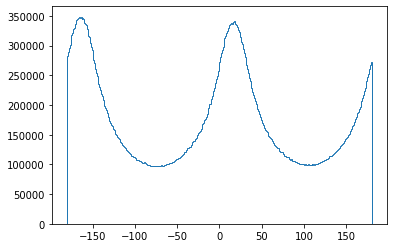

In [34]:
datapath="/mnt/home/bbhattarai/B3/"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
plotpath="/mnt/home/bbhattarai/resonance_sweeping/plots/"

i=336

snapshot=i
pfile = open(datapath+'step'+str(snapshot)+'.p', 'rb')
idd,x,y,z,vx,vy,vz,mass=pickle.load(pfile)
#Converting to cylindrical
vr,vphi,vzz=coords.rect_to_cyl_vec(vx,vy,vz,x,y,z)
r,phi,zz=coords.rect_to_cyl(x,y,z)
#converting phi to degrees
phi=np.rad2deg(phi)

#calculating bar_angle
discindx=(mass<1e-7)
barsample=(r>1)*(r<3)*discindx
counts, bins, patches=plt.hist(phi[barsample],bins=360,histtype='step')
bin_centres=bins[:-1]+(bins[1]-bins[0])/2
max_indx=np.argmax(counts)
barangle_degrees=bin_centres[max_indx]
#a.append(barangle_degrees)
print(barangle_degrees)   


In [58]:
print(type(angles))
print(type(barangle_degrees))
bd=np.array([barangle_degrees])

print(bd)

<class 'numpy.ndarray'>
<class 'numpy.float64'>
[-163.49999464]


In [64]:
c=np.concatenate((angles,bd))
print(len(c))

337


In [66]:
savedatapath="/mnt/home/bbhattarai/resonance_sweeping/"

datafilename="0_to_336_B3_saved_barangles_combined.ang"

with open(savedatapath+datafilename, 'wb') as output:
    pickle.dump(c, output)